### Import Libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from scipy.interpolate import interp1d
from scipy.optimize import brentq
from scipy import optimize as opt
import scipy.integrate as integrate


### Load Data

In [4]:
nsamples=4
T=0.466
data={'samples':[],'mean':[],'err':[]}
data['samples']=[np.loadtxt('../OUTPUT/T'+str(T)+'/N1080/S'+str(i)+'/corrF.txt',comments='#',usecols=(1,4,5), dtype=np.float64) for i in range(nsamples)]
data['mean']=np.mean(data['samples'],axis=0)
data['err']=np.std(data['samples'],axis=0)/np.sqrt(nsamples-1)

### Draw Correlation functions

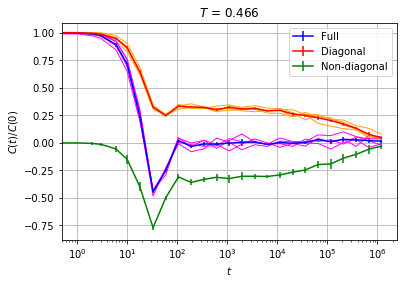

In [5]:
plt.xlabel('$t$')
plt.ylabel('$C(t)/C(0)$')
plt.xscale('log')

for i in range(nsamples):
	plt.plot(data['samples'][i][:,0], data['samples'][i][:,1], linewidth='1.0', color='magenta')
	plt.plot(data['samples'][i][:,0], data['samples'][i][:,2], linewidth='1.0', color='orange')

plt.errorbar(data['mean'][:,0], data['mean'][:,1], data['err'][:,1], color='blue',label='Full')
plt.errorbar(data['mean'][:,0], data['mean'][:,2], data['err'][:,2], color='red',label='Diagonal')
plt.errorbar(data['mean'][:,0], data['mean'][:,1]-data['mean'][:,2], data['err'][:,2]+data['err'][:,1], color='green',label='Non-diagonal')
plt.grid()
plt.title('$T$ = '+str(T))
plt.legend(loc='upper right')
plt.show()

### Calculate integrated tau

1 - Interpolate the curves

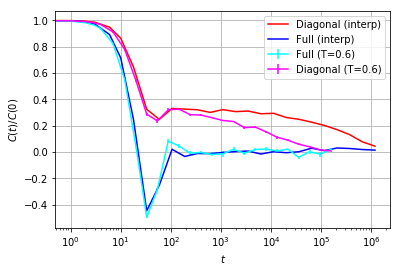

In [8]:
interpFull = interp1d(data['mean'][:,0], data['mean'][:,1], kind='cubic')
interpDiag = interp1d(data['mean'][:,0], data['mean'][:,2], kind='cubic')

plt.xlabel('$t$')
plt.ylabel('$C(t)/C(0)$')
plt.xscale('log')
plt.plot(data['mean'][:,0], interpDiag(data['mean'][:,0]), color='red',label='Diagonal (interp)')
plt.plot(data['mean'][:,0], interpFull(data['mean'][:,0]), color='blue',label='Full (interp)')
plt.grid()
plt.legend(loc='upper right')
plt.show()

2 - Integrate

In [67]:
maxFull=100
maxDiag=data['mean'][:,0][-1]
integralDiag=integrate.quad(interpDiag,0,maxDiag)
integralFull=integrate.quad(interpFull,0,maxFull)
print("tauDiag = ",integralDiag)
print("tauFull = ",integralFull)

tauDiag =  (126594.06844402535, 0.0018274792933385391)
tauFull =  (-2.831404939667135, 4.131476142471366e-08)
